# K-Means Clustering and HC Agglomerative

## Importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
%matplotlib inline

## Importing the dataset

In [10]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Genre'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Genre'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


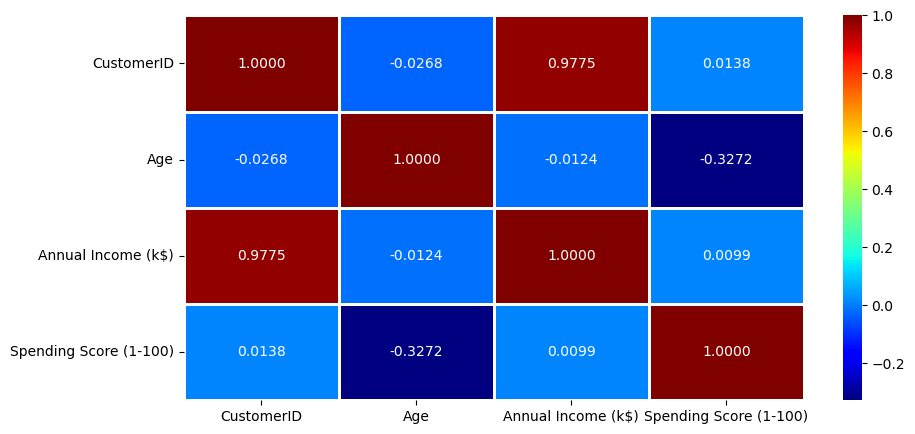

In [70]:
corr= dataset.select_dtypes(include="number").corr() #just include numerical features not object
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='jet',fmt='.4f',linewidths=1)
plt.show()

Grouping by Gender

In [71]:
#let's groupby gender
dataset.groupby("Genre").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


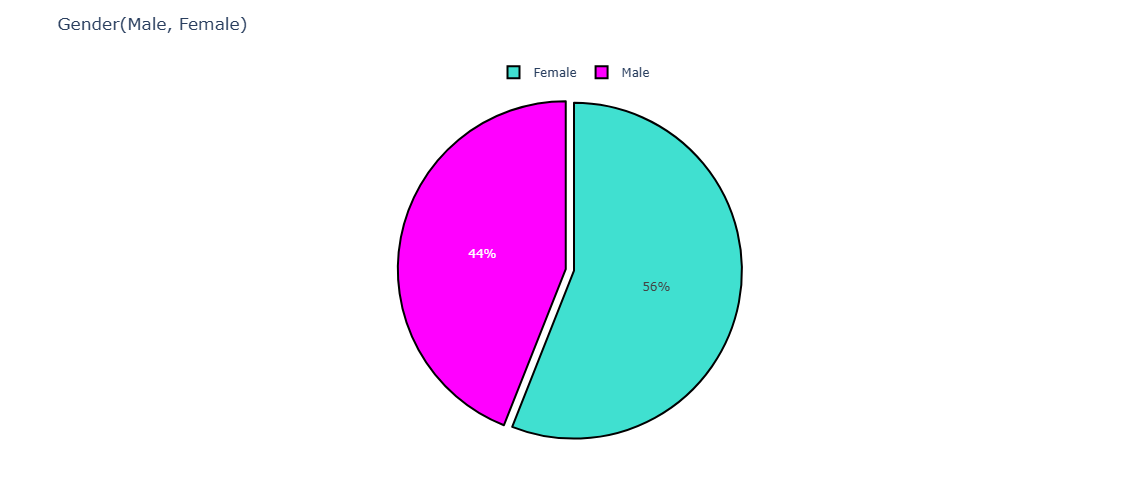

In [98]:
init_notebook_mode(connected=True)
grouped = dataset["Genre"].value_counts(sort=False).rename_axis("Genre").reset_index(name="count")
grouped = grouped.rename(columns = {"index" : col, 0: "count"})

## let's plot this
colors = ['magenta', 'turquoise']
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0],marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = {'title': 'Gender(Male, Female)'}
fig = go.Figure(data = [trace], layout = layout)
fig.update_layout(width=700, height=500,            #bigger
                  margin=dict(l=10, r=10, t=60, b=10))

fig.update_traces(domain=dict(x=[0.08, 0.92],       # take sup more canvas
                              y=[0.10, 0.92]),
                  textposition='inside')

fig.update_layout(legend=dict(orientation='h',      # moves legend up
                              y=1.005, x=0.5, xanchor='center'))
iplot(fig)

### As we saw above, we can infer females are visiting malls more than males.

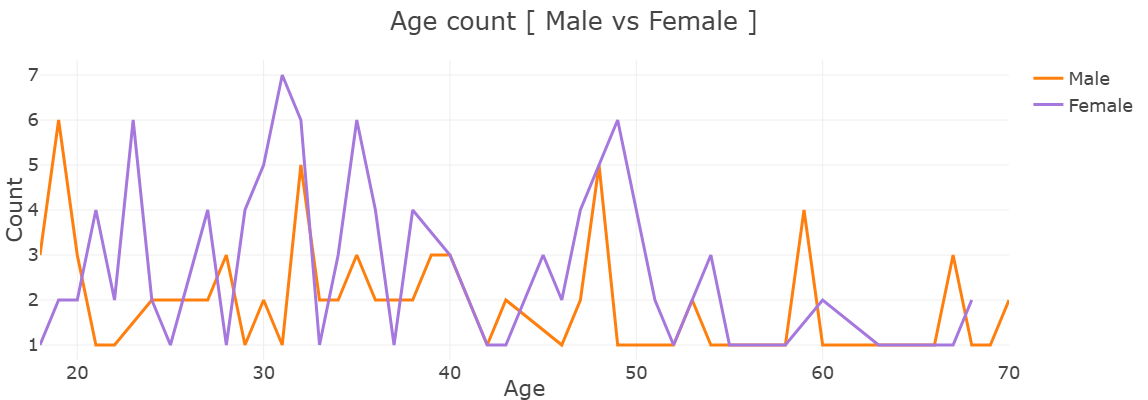

In [157]:
# Separate by gender
d1 = dataset[dataset['Genre'] == 'Male']
d2 = dataset[dataset['Genre'] == 'Female']
col = 'Age'  
# --- Counting ---
v1 = (d1[col].value_counts(sort=False)     #  -> count bye age 
          .rename_axis(col)                # the index (ages)
          .reset_index(name='count')       # pass DataFrame with columns ['Age','count']
          .sort_values(col))               # order by age

v2 = (d2[col].value_counts(sort=False)
          .rename_axis(col)
          .reset_index(name='count')
          .sort_values(col))


trace1 = go.Scatter(x=v1[col], y=v1['count'], name='Male',
                    marker=dict(color='#ff7f0e'))
trace2 = go.Scatter(x=v2[col], y=v2['count'], name='Female',
                    marker=dict(color='#a678de'))

layout = {'title':'Age count [ Male vs Female ]',
          'xaxis':{'title':'Age'},
          'yaxis':{'title':'Count'},
          'width': 900,        
          'height': 400,      
          'margin': {'l':40,'r':10,'t':60,'b':40}
}
fig = go.Figure(data=[trace1, trace2],layout=layout)
fig.layout.template='presentation'
iplot(fig)


The above plot tells us that females between the age of 23 and 49 are visiting mall more frequently whereas male between the age of 19 and 48 frequent the mall more, but even so the females visit the mall more than males.

### Taking the values of Anual Income and Spending Score

In [121]:
X = dataset.iloc[:, [3, 4]].values
print(f"Data type and shape of X: {type(X)}, {X.shape}")
print(f"Values of X: \n{X}")


Data type and shape of X: <class 'numpy.ndarray'>, (200, 2)
Values of X: 
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [

In [115]:
#for better view
dataset[["Annual Income (k$)","Spending Score (1-100)"]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Using the dendrogram to find the optimal number of clusters

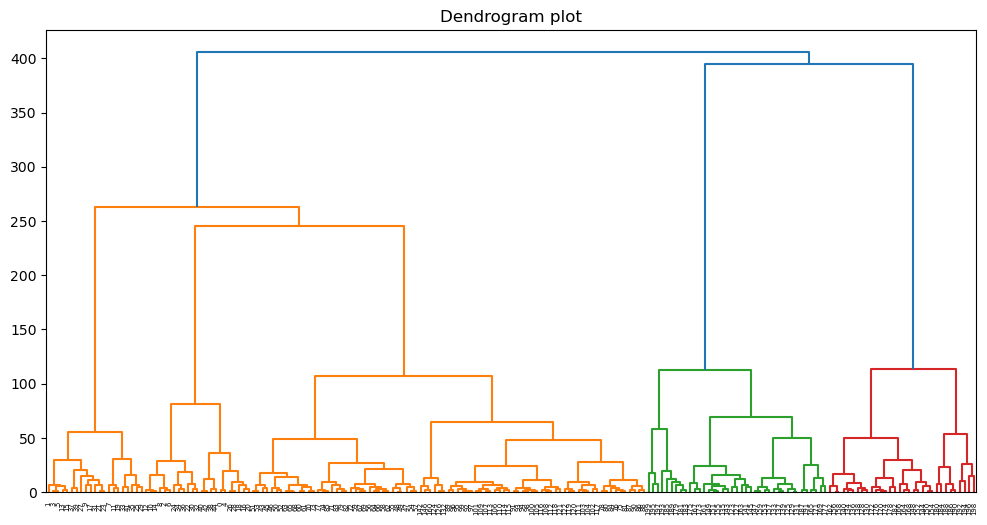

In [165]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,6))
dendrogram=sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [171]:
from sklearn.cluster import AgglomerativeClustering as AG
hc=AG(n_clusters = 5, linkage='ward') #assuming euclidean metric with ward
y_hc=hc.fit_predict(X)



## Visualising the Clusters

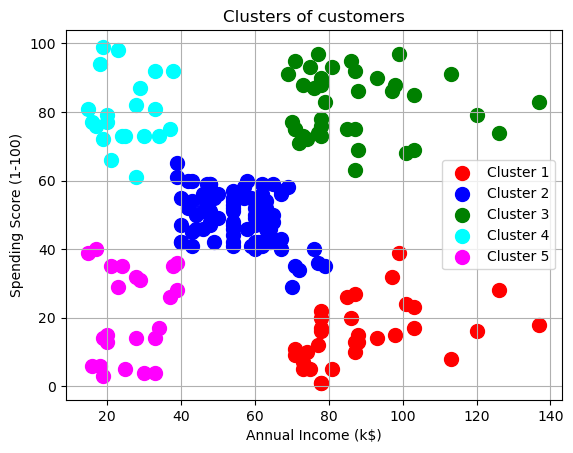

In [175]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

## Using the elbow method to find the optimal number of clusters

D:\Santi\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Santi\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Santi\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Santi\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

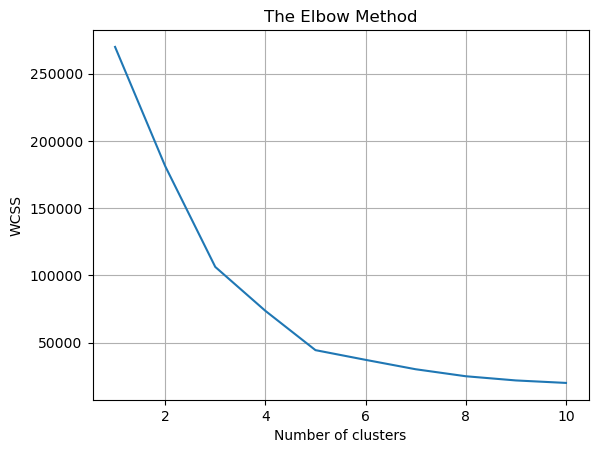

In [101]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### As we can see, the curve isn't steep enough after after 5 clusters so we can take this number
We want to find groups which aren't unlabeled in the data

## Training the K-Means model on the dataset

In [102]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

D:\Santi\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Each cluster makes a match by components, we can see it as follows

In [138]:
print(f"Values of : {y_kmeans}, \nThey must have the same shape as X in the following way X(n,m), y_kmeans(n,), let's see if they match: \n{y_kmeans.shape}, {X.shape}\n")
#we compare for each value of X a cluster is assigned
print(X[y_kmeans == 0,0]) #for cluster 0 the following X.values are labeled in it

Values of : [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1], 
They must have the same shape as X in the following way X(n,m), y_kmeans(n,), let's see if they match: 
(200,), (200, 2)

[39 40 40 40 40 42 42 43 43 43 43 44 44 46 46 46 46 47 47 48 48 48 48 48
 48 49 49 50 50 54 54 54 54 54 54 54 54 54 54 54 54 57 57 58 58 59 59 60
 60 60 60 60 60 61 61 62 62 62 62 62 62 63 63 63 63 63 63 64 64 65 65 65
 65 67 67 67 67 69 71 72 76]


## Visualising the clusters

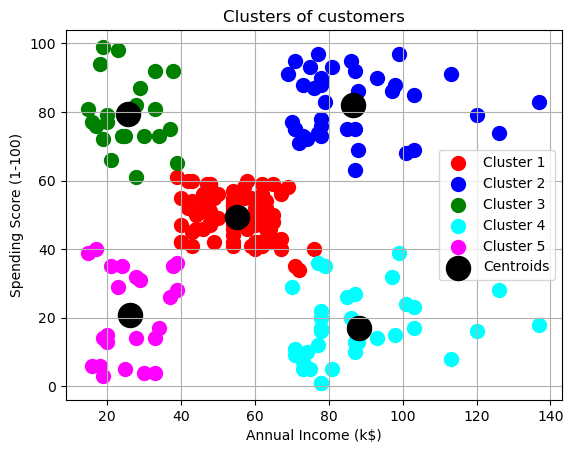

In [140]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend()
plt.show()

## Analyzing the results 
 + ### *Cluster 1:* The people here are the average income and spending score. They might not be the prime target but can be considered with other techniques to increase their their spending score.
 
 + ### *Cluster 2:* We see people here often to spending more and have high income. They must be convinced with the mall facilities as these people are the prime sources of profit.
 
 + ### *Cluster 3:* We can see this people have low income but actually higher spending score. Maybe they love the mall services therefore they often buy products. The mall might not be target them because of the income but still will not lose them.
 
 + ### **Cluster 4:** Here we have our prime target because these people have higher income but for some reason low spending score, maybe they are not satisfied with the mall's services and products. As these people have the potential for increase their spending score, the mall authorities should try to add new services and facilities in order to attract these people.
 
 + ### *Cluster 5:* These people have low income and low spending score, this is quite reasonable, they know how to spend according to their income. So we can be least interested in people of this cluster.